### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)         
pd.set_option('display.max_rows', 200)    

### Loading Dataset

In [2]:
df = pd.read_excel("C:\\Users\\admi\\Desktop\\Saachi\\Dhirubhai Ambani University\\Sem 1\\Machine Learning Theory\\Project\\diabetes+130-us+hospitals+for+years+1999-2008\\diabetic_data.xlsx")   
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.shape

(101766, 50)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### Handling Missing Values

In [5]:
df = df.replace("?", np.nan)

### Dropping unnecessary columns

In [6]:
drop_cols = [
    'encounter_id',
    'patient_nbr',
    'citoglipton',
    'examide',
    'acetohexamide',
    'tolbutamide',
    'troglitazone',
    'glimepiride-pioglitazone',
    'glipizide-metformin',
    'metformin-rosiglitazone',
    'metformin-pioglitazone',
    'miglitol',   
    'weight',       
    'payer_code'    
]

In [7]:
df = df.drop(columns=drop_cols, errors='ignore')

In [8]:
print("\nRemaining columns:", len(df.columns))
df.head()



Remaining columns: 36


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,tolazamide,insulin,glyburide-metformin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,Up,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,Up,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,Steady,No,No,No,No,No,Steady,No,Ch,Yes,NO


In [9]:
df.isnull().sum().sort_values(ascending=False)

max_glu_serum               96420
A1Cresult                   84748
medical_specialty           49949
race                         2273
diag_3                       1423
diag_2                        358
diag_1                         21
gender                          0
admission_type_id               0
age                             0
admission_source_id             0
discharge_disposition_id        0
number_outpatient               0
num_medications                 0
num_procedures                  0
num_lab_procedures              0
time_in_hospital                0
number_inpatient                0
number_emergency                0
number_diagnoses                0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
glipizide                       0
glyburide                       0
pioglitazone                    0
rosiglitazone                   0
acarbose      

In [10]:
df['race'] = df['race'].fillna("Unknown")
df['medical_specialty'] = df['medical_specialty'].fillna("Unknown")
df['diag_1'] = df['diag_1'].fillna("Unknown")
df['diag_2'] = df['diag_2'].fillna("Unknown")
df['diag_3'] = df['diag_3'].fillna("Unknown")
df['max_glu_serum'] = df['max_glu_serum'].fillna("None")
df['A1Cresult'] = df['A1Cresult'].fillna("None")


In [11]:
for col in ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [12]:
num_cols = df.select_dtypes(include=[int, float]).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


### Converting Age Ranges to Numeric

In [13]:
def convert_age(age_range):
    if pd.isna(age_range):
        return np.nan
    a, b = age_range[1:-1].split('-')
    return (int(a) + int(b)) / 2

df['age'] = df['age'].apply(convert_age)


In [14]:
df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
glipizide                   0
glyburide                   0
pioglitazone                0
rosiglitazone               0
acarbose                    0
tolazamide                  0
insulin                     0
glyburide-metformin         0
change    

In [15]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,tolazamide,insulin,glyburide-metformin,change,diabetesMed,readmitted
0,Caucasian,Female,5.0,6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,Unknown,Unknown,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,15.0,1,1,7,3,Unknown,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,Up,No,Ch,Yes,>30
2,AfricanAmerican,Female,25.0,1,1,7,2,Unknown,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,35.0,1,1,7,2,Unknown,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,Up,No,Ch,Yes,NO
4,Caucasian,Male,45.0,1,1,7,1,Unknown,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,Steady,No,No,No,No,No,Steady,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,75.0,1,3,7,3,Unknown,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,Down,No,Ch,Yes,>30
101762,AfricanAmerican,Female,85.0,1,4,5,5,Unknown,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,Yes,NO
101763,Caucasian,Male,75.0,1,1,7,1,Unknown,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,Down,No,Ch,Yes,NO
101764,Caucasian,Female,85.0,2,3,7,10,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,Steady,No,Steady,No,No,No,Up,No,Ch,Yes,NO


### Mapping

In [16]:
glu_map = {"None":0, "Norm":1, ">200":2, ">300":3}
df['max_glu_serum'] = df['max_glu_serum'].map(glu_map)

a1c_map = {"None":0, "Norm":1, ">7":2, ">8":3}
df['A1Cresult'] = df['A1Cresult'].map(a1c_map)


In [17]:
medication_cols = [
    'metformin','repaglinide','nateglinide','chlorpropamide',
    'glimepiride','glipizide','glyburide','pioglitazone',
    'rosiglitazone','acarbose','tolazamide','insulin',
    'glyburide-metformin'
]

med_map = {"No":0, "Steady":1, "Up":2, "Down":3}

for col in medication_cols:
    df[col] = df[col].map(med_map)

In [18]:
binary_map = {"No":0, "Yes":1, "Ch":1}
df['change'] = df['change'].map(binary_map)
df['diabetesMed'] = df['diabetesMed'].map(binary_map)

In [19]:
specialty_counts = df['medical_specialty'].value_counts()
rare_specialties = specialty_counts[specialty_counts < 300].index

df['medical_specialty'] = df['medical_specialty'].replace(rare_specialties, "Other")

### Mapping IDS-9 Diagnosis Codes

In [20]:
def map_ids(code):
    try:
        code = float(code)
    except:
        return "Other"

    if 390 <= code <= 459 or code == 785:
        return "Circulatory"
    elif 460 <= code <= 519:
        return "Respiratory"
    elif 520 <= code <= 579:
        return "Digestive"
    elif code == 250:
        return "Diabetes"
    elif 800 <= code <= 999:
        return "Injury"
    elif 710 <= code <= 739:
        return "Musculoskeletal"
    elif 580 <= code <= 629:
        return "Genitourinary"
    elif 140 <= code <= 239:
        return "Neoplasms"
    else:
        return "Other"

df["diag_1"] = df["diag_1"].apply(map_ids)
df["diag_2"] = df["diag_2"].apply(map_ids)
df["diag_3"] = df["diag_3"].apply(map_ids)

In [21]:
df["readmit_binary"] = df["readmitted"].apply(lambda x: 1 if x in ["<30"] else 0)
df.drop(columns=["readmitted"], inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   race                      101766 non-null  object 
 1   gender                    101766 non-null  object 
 2   age                       101766 non-null  float64
 3   admission_type_id         101766 non-null  int64  
 4   discharge_disposition_id  101766 non-null  int64  
 5   admission_source_id       101766 non-null  int64  
 6   time_in_hospital          101766 non-null  int64  
 7   medical_specialty         101766 non-null  object 
 8   num_lab_procedures        101766 non-null  int64  
 9   num_procedures            101766 non-null  int64  
 10  num_medications           101766 non-null  int64  
 11  number_outpatient         101766 non-null  int64  
 12  number_emergency          101766 non-null  int64  
 13  number_inpatient          101766 non-null  i

In [23]:
print("SHAPE:", df.shape)
print("\nCHECK NULL VALUES:")
print(df.isnull().sum())

SHAPE: (101766, 36)

CHECK NULL VALUES:
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
glipizide                   0
glyburide                   0
pioglitazone                0
rosiglitazone               0
acarbose                    0
tolazamide                  0
insulin                     0


In [24]:
print("\nDATA TYPES:")
print(df.dtypes)

print("\nCATEGORY SAMPLE CHECK:")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_rows", 10)
display(df.sample(10, random_state=42))

print("\nVALUE COUNTS FOR TARGET:")
print(df['readmit_binary'].value_counts())



DATA TYPES:
race                         object
gender                       object
age                         float64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
medical_specialty            object
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
glipizide                     int64
glyburide                     int64
pioglitazone   

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,tolazamide,insulin,glyburide-metformin,change,diabetesMed,readmit_binary
35956,Caucasian,Female,75.0,1,1,6,11,InternalMedicine,68,0,20,0,0,0,Other,Genitourinary,Other,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
60927,Caucasian,Male,55.0,1,1,1,1,Unknown,20,0,7,0,0,0,Other,Circulatory,Other,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
79920,Caucasian,Female,65.0,3,6,1,4,Unknown,21,3,23,1,0,2,Musculoskeletal,Musculoskeletal,Musculoskeletal,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
50078,Caucasian,Male,35.0,2,1,1,12,Gastroenterology,28,0,19,0,0,1,Respiratory,Other,Other,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
44080,AfricanAmerican,Female,65.0,1,2,7,1,Unknown,21,0,6,0,0,0,Circulatory,Genitourinary,Circulatory,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4727,Caucasian,Male,85.0,3,1,1,7,Unknown,42,2,27,0,0,0,Neoplasms,Diabetes,Other,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
29944,AfricanAmerican,Female,75.0,1,1,7,6,Nephrology,43,2,17,0,0,0,Digestive,Other,Circulatory,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
84575,Caucasian,Female,45.0,1,6,7,5,Unknown,55,0,20,1,1,0,Injury,Other,Other,9,0,3,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0
59479,Caucasian,Male,85.0,1,3,7,5,InternalMedicine,50,0,26,0,0,0,Respiratory,Circulatory,Other,5,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,1,1,1
56742,AfricanAmerican,Female,65.0,1,6,7,7,Unknown,61,0,6,0,0,1,Other,Circulatory,Other,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



VALUE COUNTS FOR TARGET:
readmit_binary
0    90409
1    11357
Name: count, dtype: int64


### Saving cleaned dataset

In [25]:
df.to_csv("cleaned_data_1.csv", index=False)
print("CLEANED DATA SAVED SUCCESSFULLY!")

CLEANED DATA SAVED SUCCESSFULLY!


### Final Validation of the Cleaned Dataset

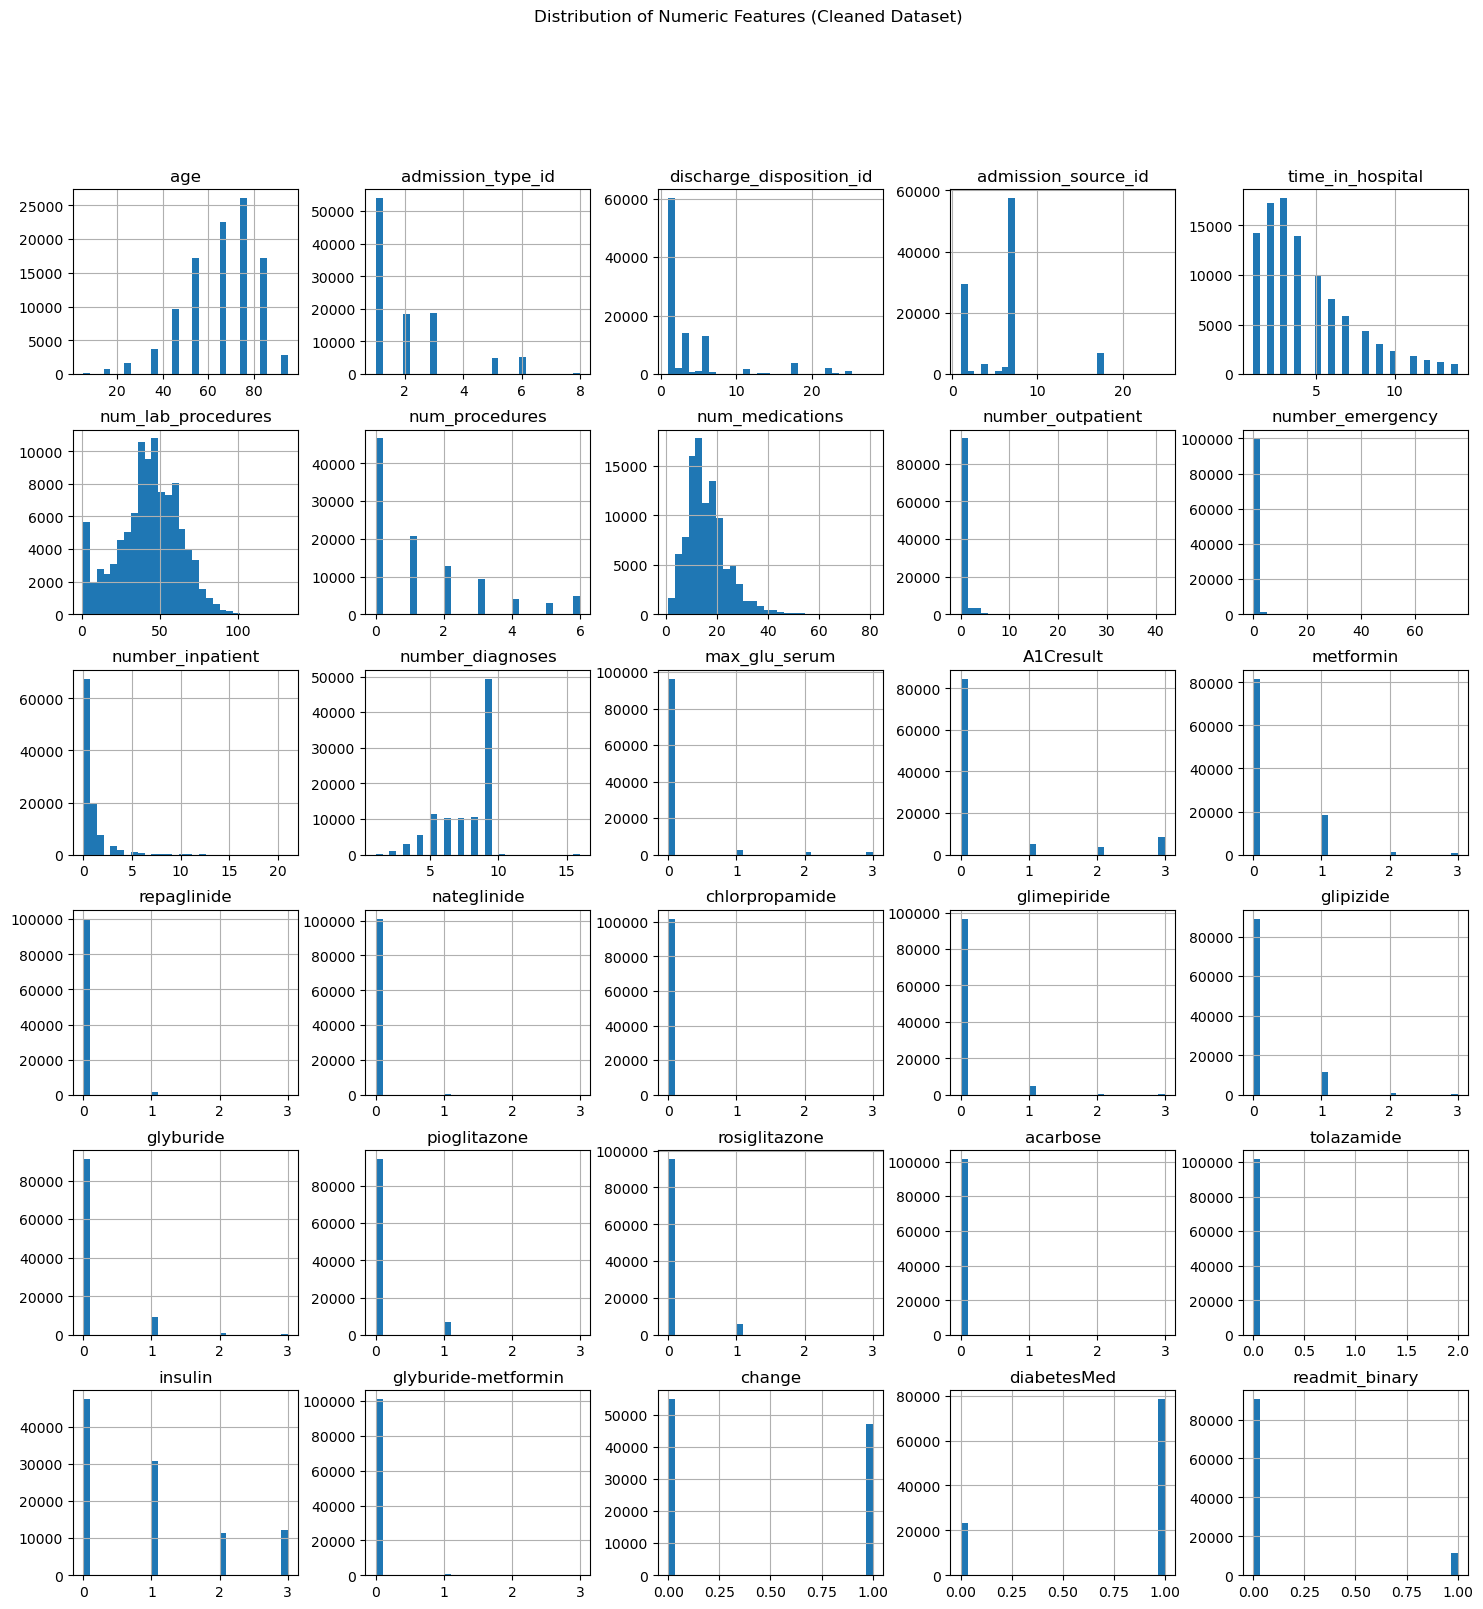

In [26]:
df.select_dtypes(include=['int64','float64']).hist(figsize=(18, 18), bins=30)
plt.suptitle("Distribution of Numeric Features (Cleaned Dataset)")
plt.show()

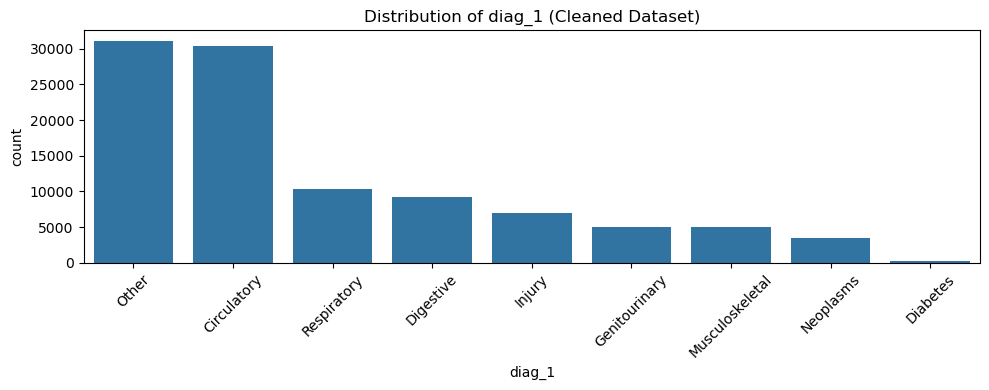

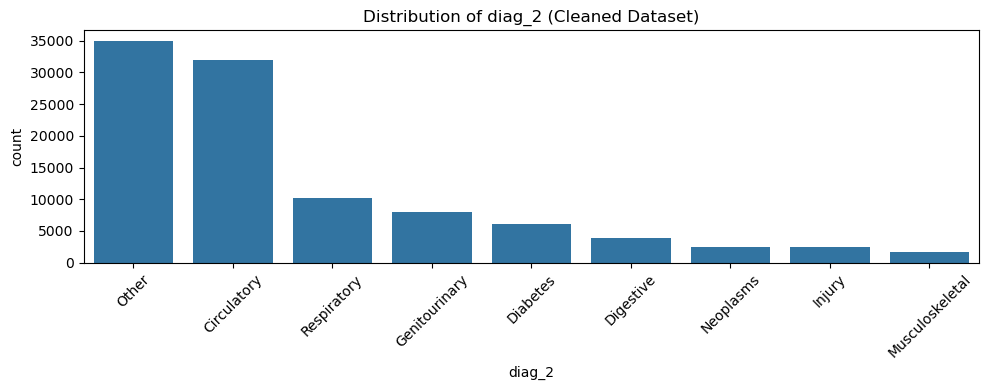

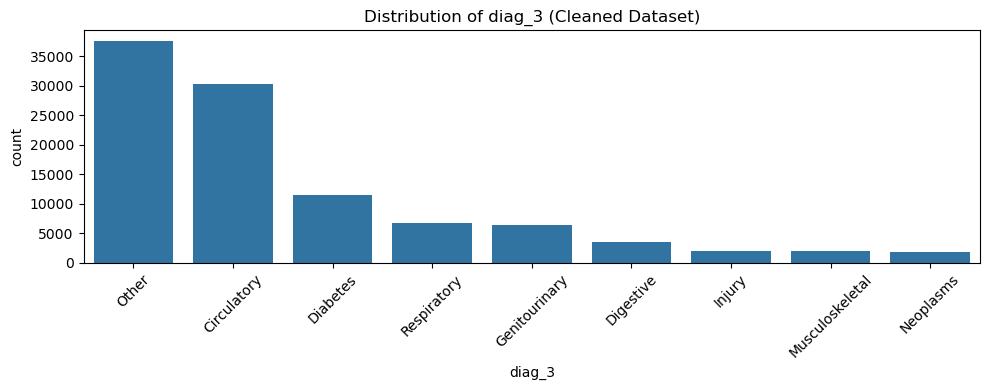

In [27]:
temp = [ "diag_1", "diag_2", "diag_3"]

for col in temp:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col} (Cleaned Dataset)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


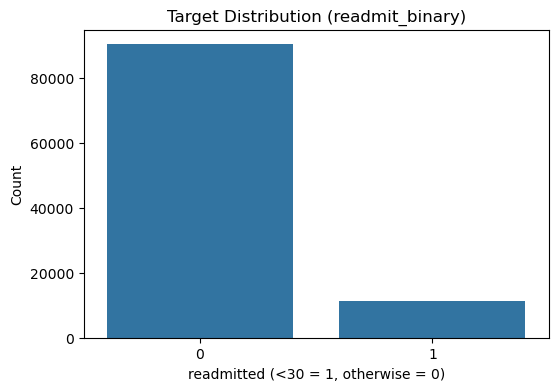

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['readmit_binary'])
plt.title("Target Distribution (readmit_binary)")
plt.xlabel("readmitted (<30 = 1, otherwise = 0)")
plt.ylabel("Count")
plt.show()